In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv(r"C:\\Users\\Giorgis\\Desktop\\Projects\\ADTA coursework\\partI\\Census.csv")
data.head(1)

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4


In [4]:
data1 = data.drop(['Region', 'Residence Type', 'No of hours', 'Person ID'], axis=1)

df = data1
df

,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,-9
2,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,2
3,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,4
4,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,-9,1,1,2,1,2,2,1,1,2,1,3,9,4,-9
569736,-9,1,1,3,1,2,2,2,2,1,1,1,5,4,-9
569737,-9,1,2,5,2,2,1,1,1,2,2,1,8,4,-9
569738,2,1,1,6,2,2,1,3,1,1,1,6,10,4,3


#### <font color=#225e71> Excluding the _-9_ value of the Approximated Social Grade attribute </font>

In [5]:
df_exclude = df[(df['Approximated Social Grade'] == -9)]

df = df.drop(df_exclude.index)
df

,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
2,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,2
3,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,4
5,1,1,2,2,1,1,1,2,1,1,4,-9,-9,-9,2
6,1,1,2,2,1,1,1,2,1,1,4,7,6,-9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569724,5,1,2,4,2,2,1,2,1,1,2,1,1,4,2
569725,2,1,1,2,1,2,1,1,1,9,1,1,3,4,2
569726,2,1,1,4,2,2,1,2,1,1,1,9,6,4,3
569738,2,1,1,6,2,2,1,3,1,1,1,6,10,4,3


In [6]:
X = df.drop('Approximated Social Grade', axis=1)

In [7]:
y = df['Approximated Social Grade']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### <font color=#225e71>Random forest Classification number of estimators is 200</font>

In [9]:
rfc = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=1, max_depth=10)

In [10]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=1)

In [11]:
rfc_predictions = rfc.predict(X_test)

In [12]:
print('Confusion matrix:\n {}'.format(confusion_matrix(y_test, rfc_predictions)))
print('\n')
print('Classification report:\n {}'.format(classification_report(y_test, rfc_predictions)))
print('\n')
print('Model\'s accuracy:\n {}'.format(accuracy_score(y_test, rfc_predictions)))

Confusion matrix:
 [[15418  3982    56  1198]
 [ 3859 31916   995  3337]
 [  282   875 12829  5888]
 [  303  1099  2672 26701]]


Classification report:
               precision    recall  f1-score   support

           1       0.78      0.75      0.76     20654
           2       0.84      0.80      0.82     40107
           3       0.78      0.65      0.70     19874
           4       0.72      0.87      0.79     30775

    accuracy                           0.78    111410
   macro avg       0.78      0.76      0.77    111410
weighted avg       0.78      0.78      0.78    111410



Model's accuracy:
 0.7796786643927834


In [13]:
score2 = rfc.score(X_test, y_test)
score2

0.7796786643927834

#### <font color=#225e71>Finding out the important features of the algorithm </font>

In [14]:
features_imp = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=True)
features_imp

Population Base          0.000000
Religion                 0.001892
Country of Birth         0.002164
Ethnic Group             0.002277
Health                   0.011617
Family Composition       0.014440
Marital Status           0.014832
Sex                      0.020992
Age                      0.024566
Economic Activity        0.046664
Hours worked per week    0.054767
Industry                 0.091738
Student                  0.100324
Occupation               0.613727
dtype: float64

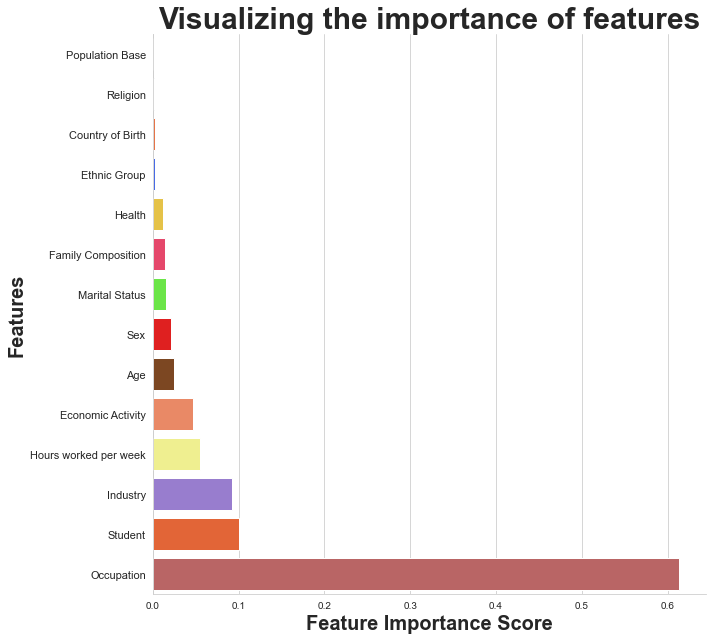

In [15]:
plt.figure(figsize=(10,9))
sns.set_style('whitegrid')

ax = sns.barplot(x=features_imp, y=features_imp.index, palette=["black", '#351a4f', "#ff692e", "#2e5cff", "#ffd12e", "#ff2e5c", "#5cff2e", "#ff0000",
          "#8b4513", "#ff7f50", "#ffff80", '#9370db', '#ff581a', '#c75757'])
ax.set_xlabel('Feature Importance Score', size=20, fontweight='bold')
ax.set_ylabel('Features' ,size=20, fontweight='bold')
ax.set_title('Visualizing the importance of features', size=30, fontweight='bold')


ax.set_yticklabels(features_imp.index.tolist())

plt.setp(ax.get_yticklabels(), rotation=0, size=11)

plt.tight_layout()
sns.despine()

plt.savefig('feat_import_RF.jpeg')